# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [114]:
import pandas as pd 
from matplotlib import pyplot as plt
# importar librerías

In [115]:
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';') # leer conjuntos de datos en los DataFrames

In [116]:
df_instacart_orders.info()
df_instacart_orders.describe()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [117]:
df_products.info(show_counts=True)
df_products.describe()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [118]:
df_aisles.info(show_counts=True)
df_aisles.describe()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [119]:
df_departments.info(show_counts=True)
df_products.describe()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [120]:
df_order_products.info(show_counts=True)
df_order_products.describe()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Tenemos 5 dataframes, vemos que en algunas columnas hay valores ausentes.
Vemos que se comparten las mismas columnas en varios dataframes como product_id, order_id, department_id.
Tenemos datos de tipo object, float e int.
Hay 2 data frames con entradas mayores a 450000, otra con 49000 entradas aprox y las demas son menores a 134.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.


- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros):

Usando el codigo .dtypes podemos ver los tipos de datos que tiene nuestro dataframe, en este caso vemos que las columnas de ID son numeros enteros. En caso de que necesitemos cambiar el tipo de dato, usariamos el codigo .astype(int), .astype(float), .astype(str) segun sea mas conveniente para nuestro analisis.

- Identifica y completa los valores ausentes:

Para identificar la cantidad de valores ausentes por columnas se usan los codigos .isnull().sum() o .isna().sum(); en caso de hallar valores ausentes podemos completarlos con un valor especifico usando el codigo .fillna(); si quisieramos eliminar estos valores ausentes usamos .dropna() pero hay que tener en cuenta que estos cambios no deben alterar el resultado de nuestro analisis.

- Identifica y elimina los valores duplicados:

Para identificar los valores duplicados se usa .duplicated().sum().
Con el metodo .value_counts() podemos ver cuántas veces aparece cada categoría en esa columna, citando a esta de la siguiente forma: df['col_1'].value_counts(). 
Al querer eliminar los valores duplicados usamos .drop_duplicates(). Si solo queremos eliminar los duplicados de ciertas columnas usamos el parámetro subset=. Ejemplo: .drop_duplicates(subset='col_1')

- Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos:

Encontramos valores ausentes como NaN o datos faltantes. En caso de valores duplicados podriamos ver filas duplicadas; o valores duplicados en una columna, por ejemplo dicha columna puede mencionar las mismas categorias pero quizas algunas esten en mayusculas, minusculas, con letras repetidas o escritas incorrectamente: bueno, BUENO, bbueno, beuno.

- ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?:

Quizas al ser tipeados hubo algun error de entrada, o simplemente no hay informacion de ese dato o se evita dar respuesta a ello, en el caso de encuestas por ejemplo.

In [121]:
print(df_instacart_orders.dtypes)
print()
print(df_products.dtypes)
print()
print(df_aisles.dtypes)
print()
print(df_departments.dtypes)
print()
print(df_order_products.dtypes)

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

aisle_id     int64
aisle       object
dtype: object

department_id     int64
department       object
dtype: object

order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

Vamos a ver si hay valores duplicados en las filas. Para ellos veremos que items se repiten.

In [122]:
print(df_instacart_orders.duplicated().sum()) # numero de filas duplicadas
print()
print(df_instacart_orders['order_id'].duplicated().sum()) # numero de filas duplicadas en la columna order_id
print()
df_instacart_orders['order_id'].value_counts() # veces de valor duplicado

# Revisa si hay pedidos duplicados

15

15



2125197    2
1782114    2
1286742    2
391768     2
1021560    2
          ..
1273706    1
689148     1
1752059    1
2794488    1
2047       1
Name: order_id, Length: 478952, dtype: int64

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si, se repiten los numeros de pedido, lo cual no deberia suceder, ya que nos indican que el número de ID en "order_id" identifica de manera única cada pedido.

In [123]:
orders_3_2am = df_instacart_orders[(df_instacart_orders['order_dow'] == 3 ) & (df_instacart_orders['order_hour_of_day'] == 2)]
orders_3_2am

# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado? Que tenemos 121 pedidos que se realizaron el dia miercoles a las 2am, sin embargo sabemos que hay valores duplicados en base a los resulatdos mostrados anteriormente.

In [124]:
df_instacart_orders = (df_instacart_orders.drop_duplicates(subset='order_id'))

df_instacart_orders

# Elimina los pedidos duplicados


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [125]:
df_instacart_orders.duplicated().sum() # Vuelve a verificar si hay filas duplicadas


0

In [126]:
df_instacart_orders['order_id'].duplicated().sum() # Vuelve a verificar únicamente si hay IDs duplicados de pedidos


0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Al inicio encontramos 15 filas duplicadas, las cuales las hemos verificado por la columna 'order_id', ya que sus valores representan a cada pedido de forma unica. Luego procedimos a eliminarlas, guardar los cambios en el dataframe y verificar nuevamente.

### `products` data frame

In [127]:
df_products.duplicated().sum() # Verifica si hay filas totalmente duplicadas


0

In [128]:
df_products['department_id'].duplicated().sum() # Revisa únicamente si hay ID de departamentos duplicados


49673

In [129]:
df_products['product_name'] = df_products['product_name'].str.upper()
df_products['product_name'].duplicated().sum()

# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

1361

In [130]:
df_products_prod_faltantes = df_products[~(df_products['product_id'] =='')]['product_name']
                               
df_products_prod_faltantes.duplicated().sum()

# Revisa si hay nombres duplicados de productos no faltantes

1361

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hemos hallado que no hay filas totalmente duplicadas en todo el dataframe, sin embargo hay id de departamente que si se repiten, lo cual es entendible puesto que varios productos pueden pertenecer a un solo departamento.
Hemos cambiado todos los nombres de productos a mayusculas para hallar duplicados sin errores ortograficos y vemos que hay 1361 nombres duplicados para productos. Tambien hemos filtrado la tabla para ver los id de los productos con su respectivo nombre y vemos que hay nombres duplicados, estos son 1361.

### `departments` data frame

In [131]:
df_departments.duplicated().sum() # Revisa si hay filas totalmente duplicadas

0

In [132]:
df_departments['department_id'].duplicated().sum() # Revisa únicamente si hay IDs duplicadas de productos

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay duplicados

### `aisles` data frame

In [133]:
df_aisles.duplicated().sum() # Revisa si hay filas totalmente duplicadas

0

In [134]:
df_aisles['aisle_id'].duplicated().sum() # Revisa únicamente si hay IDs duplicadas de productos

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay duplicados

### `order_products` data frame

In [135]:
df_order_products.duplicated().sum() # Revisa si hay filas totalmente duplicadas


0

In [136]:
df_order_products.duplicated(subset=['order_id','product_id']).sum() # Vuelve a verificar si hay cualquier otro duplicado engañoso!!!!!!

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay duplicados

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [137]:
df_products['product_name'].isnull().sum() # Encuentra los valores ausentes en la columna 'product_name'

1258

Describe brevemente cuáles son tus hallazgos.

Hay 1258 valores ausentes en la columna product_name. Probablemente no ingresaron el nombre de algunos productos.

In [138]:
ausentes_pasillo_100 = df_products[(df_products['product_name'].isnull()) & (df_products['aisle_id'] ==100)]

print(ausentes_pasillo_100)

# ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Los 1258 valores ausentes que son los productos sin nombre pertencen solo al pasillo 100.

In [139]:
ausentes_department_21 = df_products[(df_products['product_name'].isnull()) & (df_products['department_id'] ==21)]

print(ausentes_department_21)

# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Todos los 1258 valores ausentes que son los productos sin nombre pertencen al departamento 21.

In [140]:
departamento_21 = df_departments[(df_departments['department_id'] == 21)]
departamento_21

# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21. 

,department_id,department
20,21,missing


In [141]:
pasillo_100 = df_aisles[(df_aisles['aisle_id'] == 100)]       
pasillo_100

,aisle_id,aisle
99,100,missing


Describe brevemente cuáles son tus hallazgos.

Hay 1258 productos que tienen diferentes id, pero que no tienen nombre y todos estos pertenecen al pasillo 100 y departamento 21.

In [142]:
df_products['product_name']= df_products['product_name'].fillna('Unknown')
df_products.info()
# Completa los nombres de productos ausentes con 'Unknown'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hemos completado los valores ausentes en la columna product_name con la palabra Unknown usando el metodo .fillna. Por lo tanto, ahora ya no hay valores ausentes en el dataframe, tal como se muestra con info().

### `orders` data frame

In [143]:
print(df_instacart_orders.isnull().sum()) # Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [144]:
aus_no_primer_pedido = df_instacart_orders[(df_instacart_orders['days_since_prior_order'].isnull()) & ~(df_instacart_orders['order_number'] == 1)]
    
print(aus_no_primer_pedido.sum())  # ¿Hay algún valor ausente que no sea el primer pedido del cliente?

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el dataframe vemos que hay 28817 valores ausentes en la columna days_since_prior_order, sin embargo no hay valores ausentes en esa misma columna cuando no son el primer pedido del cliente. Por lo tanto se entiende que haya valores ausentes cuando el cliente hace su primer pedido, ya que no se puede contabilizar el número de días transcurridos desde que este cliente hizo su pedido anterior, porque este pedido anterior no existiria.


### `order_products` data frame

In [145]:
print(df_order_products.isnull().sum()) # Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [146]:
print(df_order_products['add_to_cart_order'].max())  # ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products['add_to_cart_order'].min())

64.0
1.0


Describe brevemente cuáles son tus hallazgos.

Hay 836 valores ausentes en la columna "add_to_cart_order", y la orden secuencial en que se anadio cada articulo muestra que 1 es el minimo y 64 el maximo.

In [147]:
ped_ausente_add = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
print(ped_ausente_add.count())
print(ped_ausente_add.values)

# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

836
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1717990 1564093  129627  264710  293169 2849370 1386261 3308010  903110
 2136777 3347453 1888628  165801 2449164 2094761 3347453 1038146 2136777
 2997021  844733  844733 2136777  813364  165801 2256933  171934  264710
 2449164 2409109 3347453  813364 2926893  936852 1730767 1169835  733526
  844733  293169   61355  903110 1968313  733526 2136777 2926893  404157
 1386261  171934 3125735  747668 3308010 1169835 1800005 1961723  936852
 2849370 3308010   61355  871281 1717990  813364  388234   61355 3125735
 1959075   61355 3125735 1648217  171934 3125735   61355 1477139 1959075
 1717990 1717990   61355 1717990  171934 1038146 3308010 3347453  102236
  936852  171934 1730767 2926893 1021563 1832957 1959075 2256933 1968313
 2721963  293169  102236 3125735 1959075  264710  678116 1220886 1386261
  171934 1959075   61355 3308010   61355  102236  388234  171934 3308010
 1961723 2721963 3308010 1564093  264710  40415

In [148]:
df_order_products['Nulls'] = df_order_products['add_to_cart_order'].isnull()
reset_index()
order_nulls = df_order_products.groupby(by='order_id')['Nulls'].sum().reset_index()

order_pedidos = df_order_products.groupby(by='order_id')['product_id'].count().reset_index()

pedidos_nulls = order_nulls.merge(order_pedidos,on='order_id').rename(columns={"product_id":"Productos x orden"})

order_pedidos_64 = pedidos_nulls[pedidos_nulls['Productos x orden'] > 64]['Nulls'].sum()

print(order_pedidos_64)

# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

836


In [149]:
 # Agrupa todos los pedidos con datos ausentes por su ID de pedido.
    
df_order_products[df_order_products['add_to_cart_order'].isna()].groupby('order_id').count()

,product_id,add_to_cart_order,reordered,Nulls
order_id,,,,
9310,1,0,1,1
61355,63,0,63,63
102236,31,0,31,31
129627,5,0,5,5
165801,6,0,6,6
...,...,...,...,...
2999801,6,0,6,6
3125735,22,0,22,22
3308010,51,0,51,51


In [150]:
min_pedido = df_order_products.groupby(by='order_id')['product_id'].count()
print(min_pedido)
print()
print(min_pedido.min())

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

1


Describe brevemente cuáles son tus hallazgos.

Despues del analisi, se observa que hay 70 ordenes afectadas y 836 productos afectados. Ademas todos los pedidos con valores ausentes tienen mas de 64 productos. La compra minima que se ve en los pedidos es de un producto.

In [151]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
print(df_order_products)
print(df_order_products.isna().sum())

         order_id  product_id  add_to_cart_order  reordered  Nulls
0         2141543       11440                 17          0  False
1          567889        1560                  1          1  False
2         2261212       26683                  1          1  False
3          491251        8670                 35          1  False
4         2571142        1940                  5          1  False
...           ...         ...                ...        ...    ...
4545002    577211       15290                 12          1  False
4545003   1219554       21914                  9          0  False
4545004    692640       47766                  4          1  False
4545005    319435         691                  8          1  False
4545006   1398151       28733                  9          0  False

[4545007 rows x 5 columns]
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
Nulls                0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Ya no tenemos valores ausentes en el dataframe "order_products", ya que se ha reemplazado con 999 a estos valores ausentes en la columna "add_to_cart_order".

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Despues de ver los tipos de datos de cada columna, los hemos dejado tal cual, ya que de esa forma nos permiten analizar correctamente.
Hemos hallado valores duplicados, los cuales hemos eliminado, pero siempre teniendo en cuenta que prescindimos de ellos despues de hacer el analisis respectivo.
Respecto a los valores ausentes, hubo varios, los cuales hemos reemplazado con nuevos valores para usar mejor el data frame a futuro.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [152]:
df_instacart_orders['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [153]:
df_instacart_orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

Escribe aquí tus conclusiones

Los valores que se encuentran en ambas columnas son razonables, estan dentro del parametro idoneo: horas del dia y dias de la semana respectivamente.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

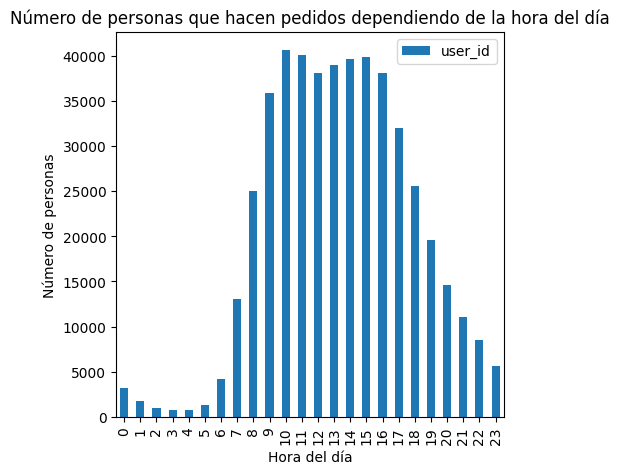

In [154]:
#Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.

pedido_horas = df_instacart_orders.groupby(by='order_hour_of_day')['user_id'].count().reset_index()

pedido_horas.plot(kind='bar',
        x='order_hour_of_day',
        y='user_id',
        title='Número de personas que hacen pedidos dependiendo de la hora del día',
        style='o-',
        figsize=[5,5],
        xlabel="Hora del día",
        ylabel="Número de personas")

plt.show()

Escribe aquí tus conclusiones

En el grafico vemos el Número de personas que hacen pedidos dependiendo de la hora del día, se ve que hay mas movimiento entre las 10am y 5pm. A partir de las 5pm este numero de pedidos va decayendo y a partir de las 5am los pedidos van aumentando.

### [A3] ¿Qué día de la semana compran víveres las personas?

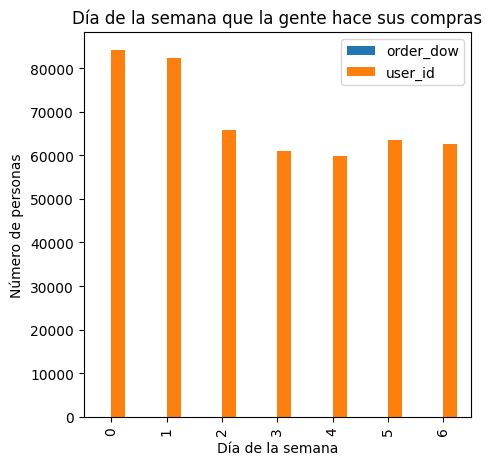

In [155]:
#Crea un gráfico que muestre qué día de la semana la gente hace sus compras

pedido_dias = df_instacart_orders.groupby(by='order_dow')['user_id'].count().reset_index()

pedido_dias.plot(kind='bar',
        title='Día de la semana que la gente hace sus compras',
        style='o-',
        figsize=[5,5],
        xlabel="Día de la semana",
        ylabel="Número de personas")

plt.show()

Escribe aquí tus conclusiones

En el grafico 'Día de la semana que la gente hace sus compras', vemos que los domingos es el dia donde las compras abundan, seguido por los lunes. En el resto de dias las compras bajan abruptamente, siendo los dias mas bajos el miercoles y jueves. Esto es un indicador favorecedor para saber que dias debemos lanzar ofertas, liquidacion de productos, etc. ya que sabemos en que dias hay mayor trafico de personas.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

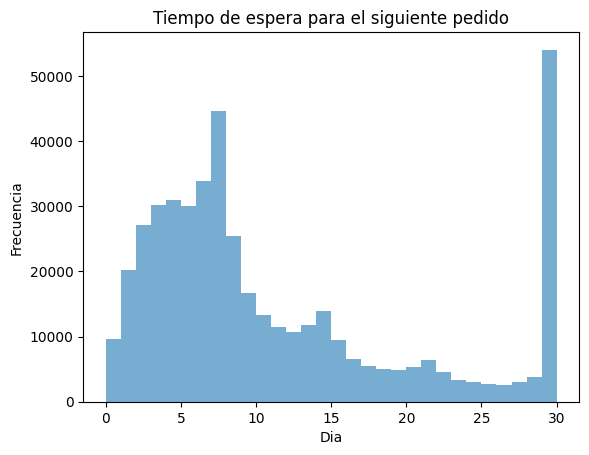

Tiempo mínimo y máximo para el siguiente pedido: 0.0 30.0


In [156]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y 
#comenta sobre los valores mínimos y máximos.

df_instacart_orders['days_since_prior_order'].plot(kind='hist', 
                                                   bins=30,
                                                   title="Tiempo de espera para el siguiente pedido",
                                                   alpha=0.6)
plt.xlabel('Dia')
plt.ylabel('Frecuencia')                                        

plt.show()

print("Tiempo mínimo y máximo para el siguiente pedido:", df_instacart_orders['days_since_prior_order'].min()
      ,df_instacart_orders['days_since_prior_order'].max())

Escribe aquí tus conclusiones

Este gráfico nos muestra el tiempo que la gente espera hasta hacer su siguiente pedido, teniendo como minimo 0 dias de espera y como maximo 30 dias de espera.
La gran mayoria de clientes tienden a esperar 30 dias seguido por 8 dias, por lo tanto se deduce que los tiempos de espera mas comunes son semanalmente y mensualmente.
Entre 16 y 29 dias, es el tiempo de espera poco comun que se observa entre la gente.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [157]:
wed_sat_orders = df_instacart_orders[(df_instacart_orders['order_dow']==3)|(df_instacart_orders['order_dow']==6)]

In [158]:
wed_sat_hour = wed_sat_orders.groupby(by=['order_hour_of_day','order_dow'])['order_id'].count().reset_index()

In [159]:
wed_sat_bar = wed_sat_hour.pivot(index='order_hour_of_day', columns='order_dow', values='order_id')
print(wed_sat_bar)

order_dow             3     6
order_hour_of_day            
0                   373   464
1                   215   254
2                   106   177
3                   101   125
4                   108   118
5                   170   161
6                   643   451
7                  1732  1619
8                  3125  3246
9                  4490  4311
10                 5026  4919
11                 5004  5116
12                 4688  5132
13                 4674  5323
14                 4774  5375
15                 5163  5188
16                 4976  5029
17                 4175  4295
18                 3463  3338
19                 2652  2610
20                 1917  1847
21                 1450  1473
22                 1154  1185
23                  718   893


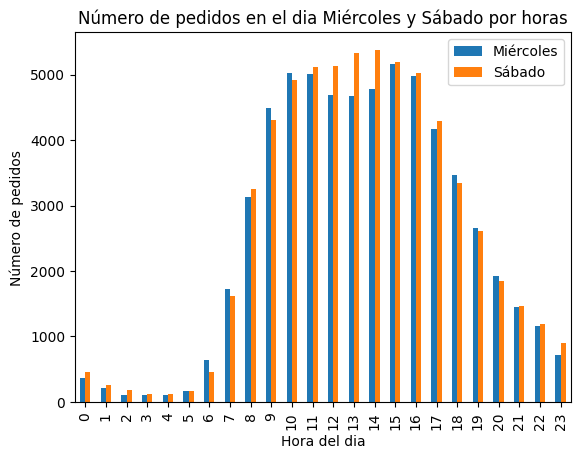

In [160]:
wed_sat_bar.plot(kind='bar',
        alpha=1,
        title="Número de pedidos en el dia Miércoles y Sábado por horas",
        xlabel="Hora del dia",
        ylabel="Número de pedidos")

plt.legend(['Miércoles','Sábado'])
plt.show()

Escribe aquí tus conclusiones

En este grafico observamos que la cantidad de pedidos realizados durante el dia Miercoles y Sabado son casi similares en todas las horas. Durante la medianoche y las 5am hay pocos pedidos. Las diferencias observadas son:
- Hay mas pedidos en el dia Sabado comparado al Miercoles, en general.
- Desde el mediodia hasta las 2pm, hay una diferencia notoria de pedidos, hubiendo mas ventas en el dia Sabado.
- Desde las 9pm y toda la madrugada, el numero de pedidos van bajando simultaneamente en ambos dias, pero aun destacando al Sabado con mas ventas.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [161]:
pedidos_cliente = df_instacart_orders.groupby(by='user_id')['order_number'].count()

pedido_cliente_bar = pedidos_cliente.value_counts()


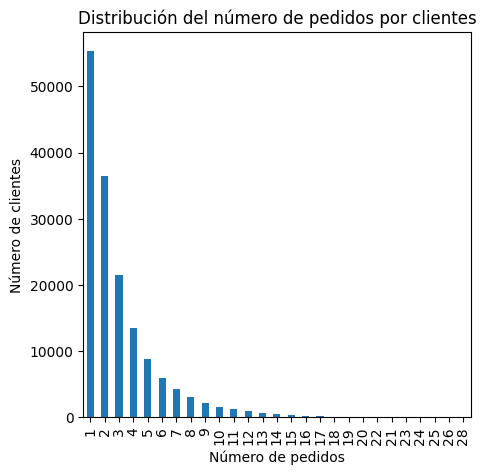

In [162]:
pedido_cliente_bar.plot(kind='bar',
        figsize=(5,5),
        title="Distribución del número de pedidos por clientes",
        xlabel="Número de pedidos",
        ylabel="Número de clientes")

plt.show()

Escribe aquí tus conclusiones

-Este grafico nos muestra cuantos clientes realizan cierta cantidad de pedidos, empezando por un pedido hasta 28 pedidos como cantidad maxima.
-Hay una gran cantidad de clientes que llegan solo a hacer un pedido y no mas, estos serian 15000 aproximadamente. Lo cual nos invita a buscar cuales son las razones por las que no vuelven comprar.
-Posterior a ello, vemos que solo hasta 10000 clientes llegan a realizar pedidos hasta 4 veces. 
-Casi nadie hace pedidos a partir de 18ma vez.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [163]:
df_merged = df_products.merge(df_order_products, left_on='product_id', right_on='product_id', how='inner')

product_20 = df_merged.groupby(['product_id','product_name'])['order_id'].count()

popular_products = product_20.sort_values(ascending=False)

top_20_popular = popular_products.head(20)

print(top_20_popular)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


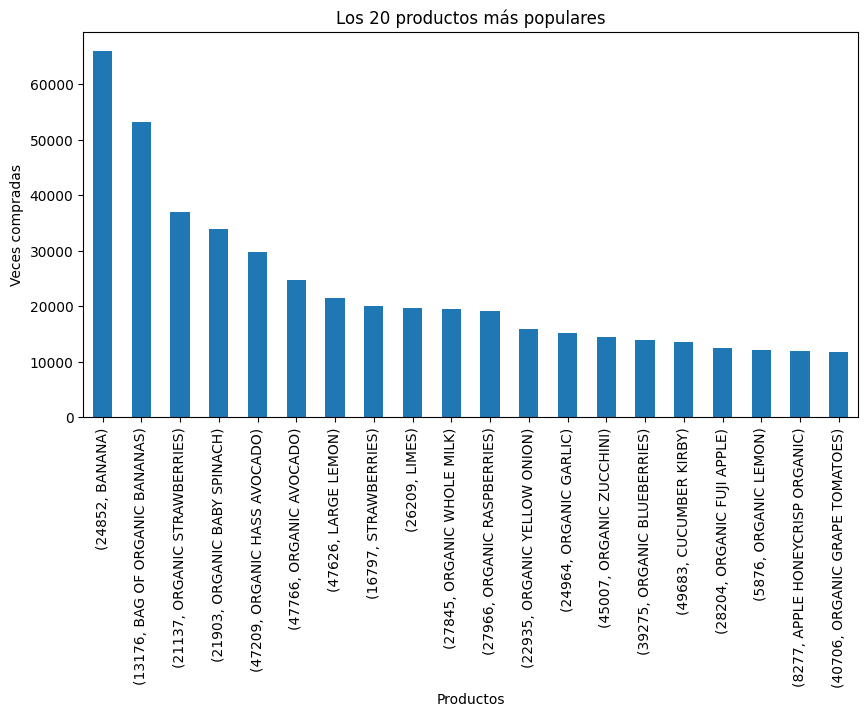

In [164]:
top_20_popular.plot(kind='bar',
        figsize=(10,5),
        title="Los 20 productos más populares",
        xlabel="Productos",
        ylabel="Veces compradas")

plt.show()

Escribe aquí tus conclusiones

Tenemos una tabla con los 20 productos mas populares, siendo la banana el mas popular, repitiendose en el primer y segundo puesto, pero con diferentes presentaciones. Posterior a ellos tenemos otros productos populares, caracterizandose en su mayoria por ser organicos. De acuerdo al grafico, se observa visualmente que la compra de bananas y fresas esta por encima de la media.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [165]:
order_merged = df_order_products.merge(df_instacart_orders, on = 'order_id')

productos_pedido = order_merged.groupby(by='order_id')['product_id'].count().value_counts().sort_index()

print(productos_pedido)

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64


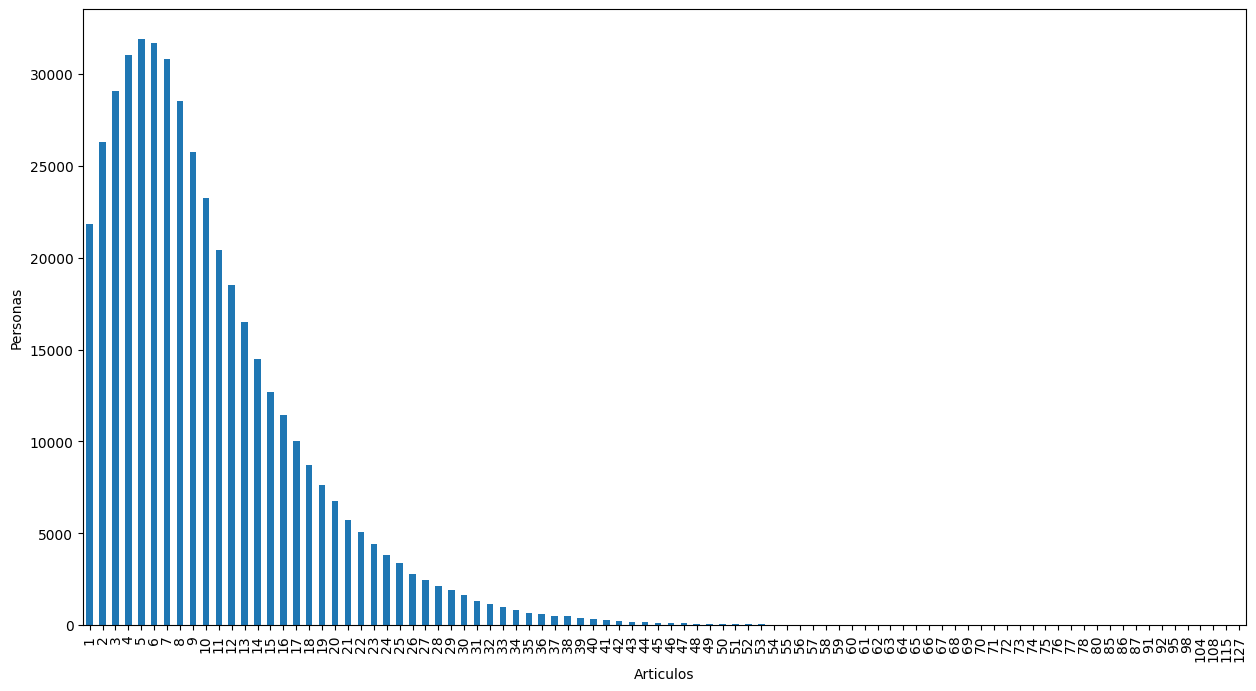

In [166]:
productos_pedido.plot(kind='bar',
                     figsize=[15,8],
                     xlabel='Articulos',
                     ylabel='Personas')
plt.show()

Escribe aquí tus conclusiones

En general la gran mayoria de personas compran entre 2 y 10 articulos. Casi nadie compra mas de 48 articulos a la vez.


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [167]:
articulos_merged = df_order_products.merge(df_products, on = 'product_id')

articulos_frecuencia = articulos_merged[articulos_merged['reordered'] == 1]

articulos_frecuencia = articulos_merged.groupby(by=['product_id','product_name'])['reordered'].count()

articulos_frecuencia.name = 'Frecuencia'

articulos_frecuencia_ordenado = articulos_frecuencia.nlargest(20).reset_index()

print(articulos_frecuencia_ordenado)

    product_id              product_name  Frecuencia
0        24852                    BANANA       66050
1        13176    BAG OF ORGANIC BANANAS       53297
2        21137      ORGANIC STRAWBERRIES       37039
3        21903      ORGANIC BABY SPINACH       33971
4        47209      ORGANIC HASS AVOCADO       29773
5        47766           ORGANIC AVOCADO       24689
6        47626               LARGE LEMON       21495
7        16797              STRAWBERRIES       20018
8        26209                     LIMES       19690
9        27845        ORGANIC WHOLE MILK       19600
10       27966       ORGANIC RASPBERRIES       19197
11       22935      ORGANIC YELLOW ONION       15898
12       24964            ORGANIC GARLIC       15292
13       45007          ORGANIC ZUCCHINI       14584
14       39275       ORGANIC BLUEBERRIES       13879
15       49683            CUCUMBER KIRBY       13675
16       28204        ORGANIC FUJI APPLE       12544
17        5876             ORGANIC LEMON      

Escribe aquí tus conclusiones

En esta tabla vemos los 20 productos que se piden con mas frecuencia, siendo las bananas el top 1 y 2. Los ultimos en la lista son los manazanas organicas y los tomates uva organicas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [175]:
product_merged = df_order_products.merge(df_products, on = 'product_id')

product_proporcion = product_merged.groupby('product_id')['reordered'].mean().sort_index()*100

product_proporcion.name = 'proporcion'

proporcion_ordenado = (pd.merge(product_proporcion,df_products,
                      right_on='product_id', left_index=True)
              .sort_values(by='proporcion',ascending=False)
             )

proporcion_ordenado

,proporcion,product_id,product_name,aisle_id,department_id
14720,100.0,14721,BONE STRENGTH TAKE CARE,133,11
20948,100.0,20949,VANILLA SANDWICH COOKIES,37,1
6722,100.0,6723,PALMIERS- PETITE,61,19
6731,100.0,6732,NATURALLY SPARKLING MINERAL WATER,115,7
45087,100.0,45088,CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & ...,2,16
...,...,...,...,...,...
10484,0.0,10485,CARAMEL APPLE POP,45,19
37689,0.0,37690,CALYPSO FRESH 2X CONCENTRATED SCENTSATIONS 166...,75,17
10483,0.0,10484,AVOCADO AND GREENS,98,7
10473,0.0,10474,NUSTEVIA WHITE STEVIA POWDER,17,13


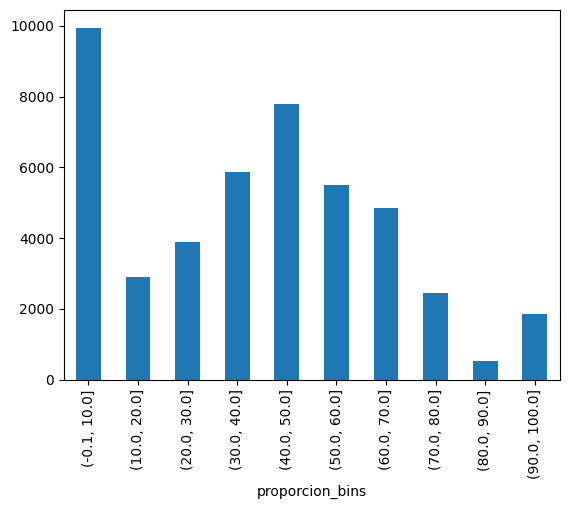

In [169]:
proporcion_ordenado["proporcion_bins"] = pd.cut(x=proporcion_ordenado["proporcion"], bins=10)

proporcion_ordenado.groupby('proporcion_bins')["proporcion"].count().plot(kind="bar")
plt.show()


Escribe aquí tus conclusiones

En el grafico de barras observamos que:
-Cerca de 10000 productos no se vuelven a pedir o tienen una probabilidad de volverse a pedir del 10%. 

-La probabilidad del 10% al 20% de volverse a comprar es para 3000 productos.

-La probabilidad del 20% al 30% de volverse a comprar y tambien del 70% al 80% es para 4000 productos aprox.

-La probabilidad del 30% al 40% de volverse a comprar y tambien del 50% a 60% es para 6000 productos aprox.

-La probabilidad del 80% al 90% de volverse a comprar es para 500 productos.

-La probabilidad del 90% al 100% de volverse a comprar es para 2000 productos.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [170]:
order_merged = df_order_products.merge(df_instacart_orders, on = 'order_id')
order_merged.head(3)

,order_id,product_id,add_to_cart_order,reordered,Nulls,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,False,58454,25,0,15,8.0
1,2141543,31869,15,1,False,58454,25,0,15,8.0
2,2141543,30233,9,1,False,58454,25,0,15,8.0


In [171]:
proporcion_producto_xcliente = order_merged.groupby('user_id')['reordered'].mean()

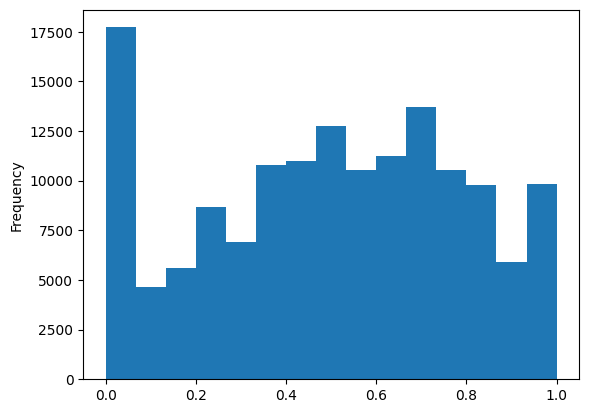

In [172]:
proporcion_producto_xcliente.plot(kind='hist',
                                 bins=15)

plt.show()

Escribe aquí tus conclusiones

Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

En el grafico vemos que una gran mayoria de clientes no habian pedido dichos productos anteriormente. Teniendo una proporcion del 0%.
Hay 10000 clientes con valor 1, que me indica que una mayoria de clientes ya habian pedido dichos productos anteriormente. Teniendo una proporcion del 100%.
En general, se observa que cada cliente suele mostrar una proporcion entre 40% y 80% de sus productos pedidos anteriormente.


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [173]:
articulos_primero = df_order_products.merge(df_products, on = 'product_id')

articulos_20_primero = articulos_primero[articulos_primero['add_to_cart_order'] == 1]

articulos_20_primero = articulos_20_primero.sort_values(by='add_to_cart_order',ascending=False)

articulos_20_primero = (articulos_20_primero.groupby(['product_id','product_name'])['add_to_cart_order']
                        .sum()
                        .nlargest(20)
                        .reset_index()
                       )

articulos_20_primero

,product_id,product_name,add_to_cart_order
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


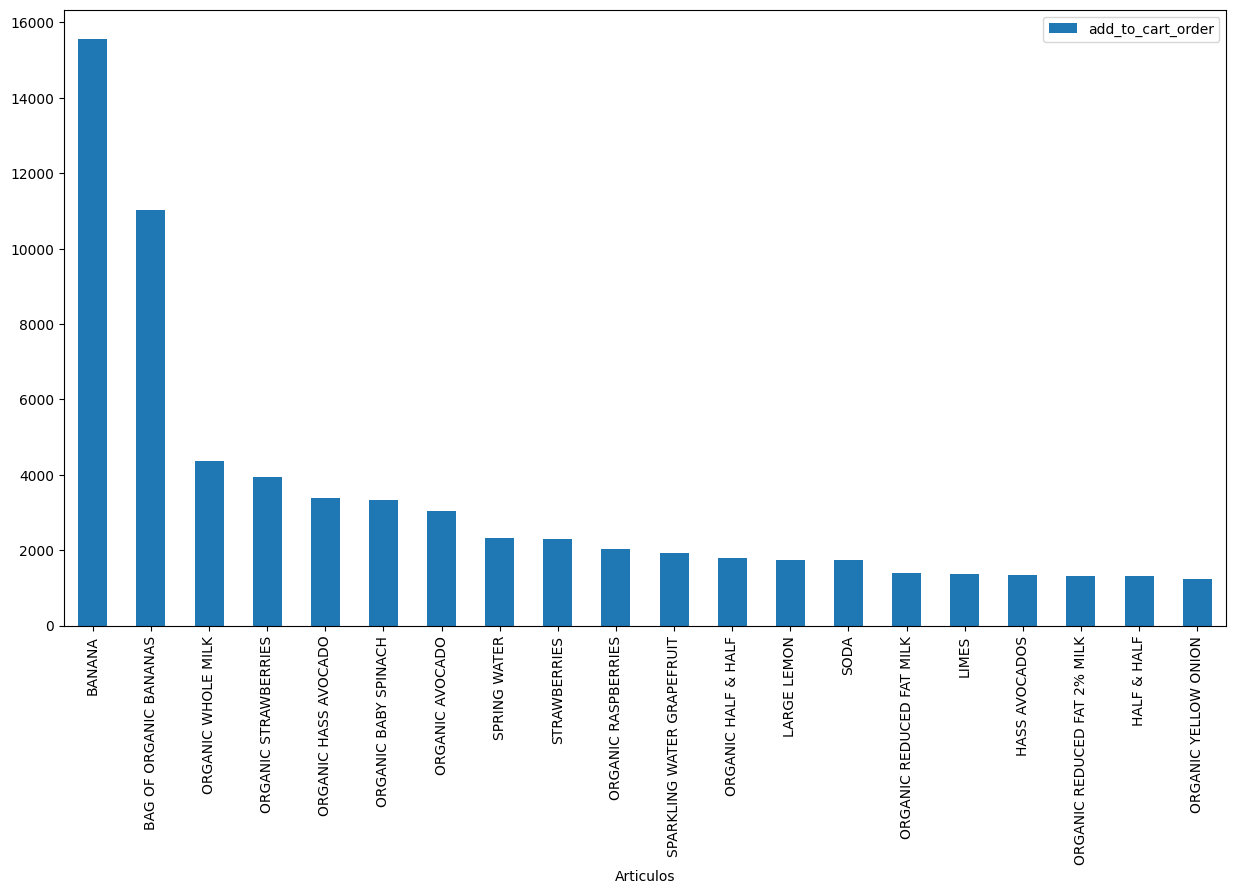

In [178]:
articulos_20_primero.plot(kind='bar',
                     x = 'product_name',
                     y = 'add_to_cart_order',
                     figsize=[15,8],
                     xlabel='Articulos',
                     )
plt.show()

Escribe aquí tus conclusiones

¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

La tabla nos muestra los primeros 20 articulos, estando en primer lugar las bananas.

### Conclusion general del proyecto:

In [ ]:
- Hay más pedidos los fines de semana (Sabado) que dentro de semana (Miercoles), en general.

- Las personas hacen pedidos dependiendo de la hora del día, habiendo mas movimientos
entre las 10am y 5pm.

- Cada cliente suele mostrar una proporcion de productos pedidos anteriormente entre el 40% y 80%, siendo el resto productos
pedidos por primera vez.

- En general la gran mayoria de personas compran entre 2 y 10 articulos en un solo pedido. Casi nadie compra mas de 48
articulos a la vez.

- Sobre los productos mas populares, sabemos que la banana  es el mas popular, repitiendose en el primer y 
segundo puesto, pero con diferentes presentaciones. Posterior a ellos tenemos otros productos populares, caracterizandose
en su mayoria por ser organicos.

- Un solo cliente en promedio compra un pedido o mas, llegando hasta 4 veces generalmente, pero hay unos pocos que hacen
hasta 28 pedidos como cantidad maxima.

SyntaxError: invalid syntax (2455928848.py, line 1)